In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Chapter 9: Question 1

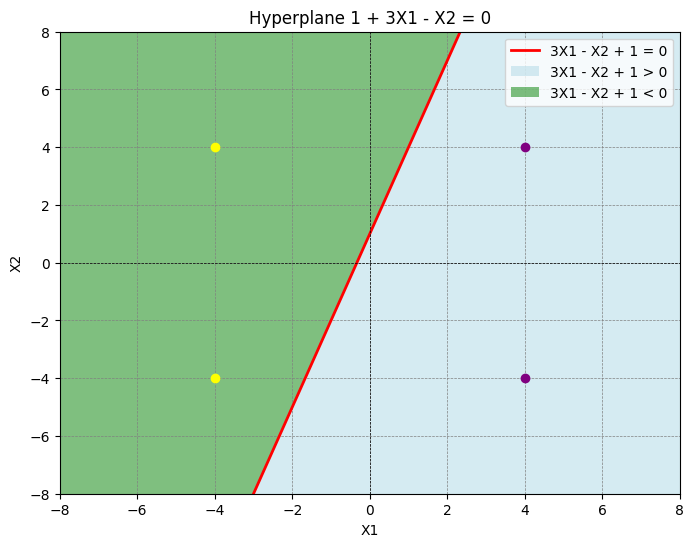

In [27]:
# a)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Hyperplane 1 + 3X1 - X2 = 0')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
x1 = np.linspace(-10,10,100)
x2 = 3*x1 + 1
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

x1_range = np.linspace(-10, 10, 100)
x2_range = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = 1 + 3*X1 - X2
ax.contourf(X1, X2, Z, levels=[0, np.max(Z)], colors=['lightblue'], alpha=0.5)
ax.contourf(X1, X2, Z, levels=[np.min(Z), 0], colors=['green'], alpha=0.5)
proxy1 = plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.5)
proxy2 = plt.Rectangle((0,0),1,1, facecolor='green', alpha=0.5)

for x_pt, y_pt in [(4,4),(-4,4),(4,-4),(-4,-4)]:
    value = 1 + 3*x_pt - y_pt
    color = 'purple' if value > 0 else 'yellow'
    ax.plot(x_pt, y_pt, 'o', color=color, markersize=6)

line_plot = ax.plot(x1, x2, '-r', linewidth=2, label='3X1 - X2 + 1 = 0')
ax.axhline(0, color='black',linewidth=0.5, ls='--')
ax.axvline(0, color='black',linewidth=0.5, ls='--')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax.legend([line_plot[0], proxy1, proxy2], ['3X1 - X2 + 1 = 0', '3X1 - X2 + 1 > 0', '3X1 - X2 + 1 < 0'])

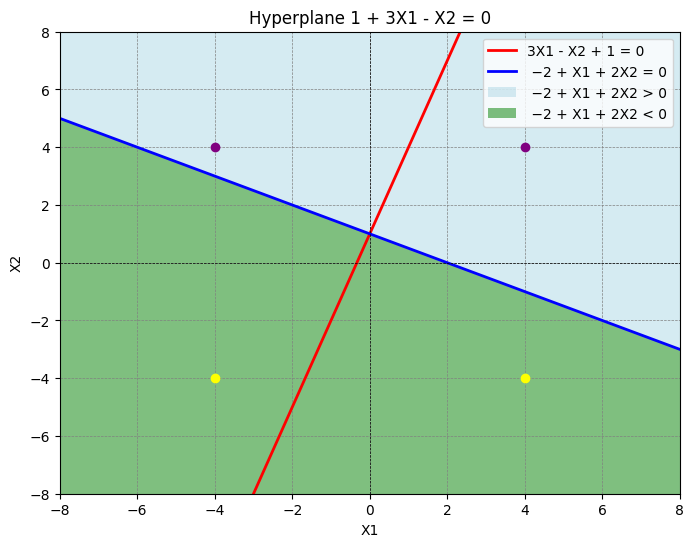

In [26]:
#b)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Hyperplane 1 + 3X1 - X2 = 0')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
x1 = np.linspace(-10,10,100)
x2 = 3*x1 + 1
x3 = 1-x1/2
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

x1_range = np.linspace(-10, 10, 100)
x2_range = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z =  X1 + 2*X2 -2
ax.contourf(X1, X2, Z, levels=[0, np.max(Z)], colors=['lightblue'], alpha=0.5)
ax.contourf(X1, X2, Z, levels=[np.min(Z), 0], colors=['green'], alpha=0.5)
proxy1 = plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.5)
proxy2 = plt.Rectangle((0,0),1,1, facecolor='green', alpha=0.5)

for x_pt, y_pt in [(4,4),(-4,4),(4,-4),(-4,-4)]:
    value = x_pt + 2*y_pt -2
    color = 'purple' if value > 0 else 'yellow'
    ax.plot(x_pt, y_pt, 'o', color=color, markersize=6)

line_plot1 = ax.plot(x1, x2, '-r', linewidth=2, label='3X1 - X2 + 1 = 0')
line_plot2 = ax.plot(x1, x3, '-b', linewidth=2, label=' −2 + X1 + 2X2 = 0')
ax.axhline(0, color='black',linewidth=0.5, ls='--')
ax.axvline(0, color='black',linewidth=0.5, ls='--')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax.legend([line_plot1[0], line_plot2[0], proxy1, proxy2], ['3X1 - X2 + 1 = 0', ' −2 + X1 + 2X2 = 0', ' −2 + X1 + 2X2 > 0', ' −2 + X1 + 2X2 < 0'])

Chapter 9: Question 5

In [32]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [28]:
# Generate data
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

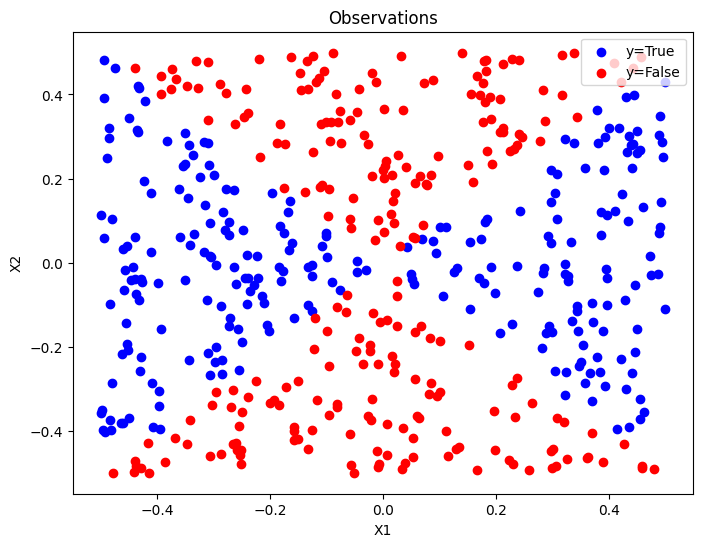

In [30]:
# Plot the observations
fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(x1[y], x2[y], color='blue', label='y=True')
ax.scatter(x1[~y], x2[~y], color='red', label='y=False')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Observations')
ax.legend()

In [ ]:
# Fit a logistic regression model 
data = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y.astype(int)})
X = data[['X1', 'X2']]
y = data['Y']
X_sm = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size=0.3, random_state=42)

logit_model = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.689953
         Iterations 4


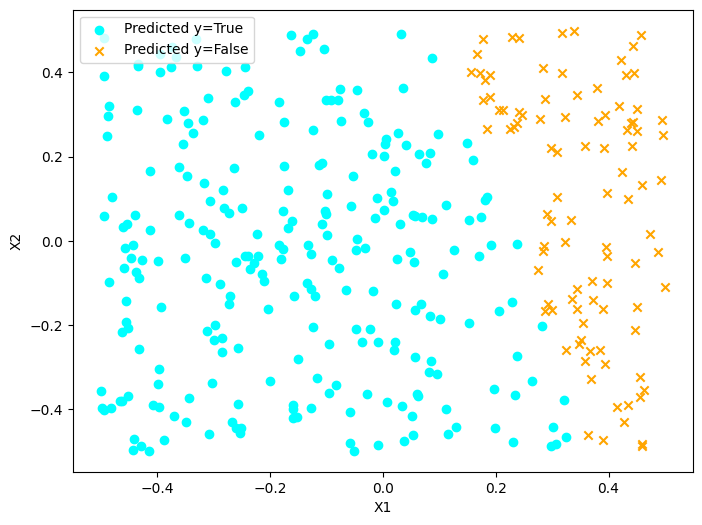

In [40]:
# Plot the predicted class labels of training data
y_train_pred = logit_model.predict(X_train)

fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(X_train['X1'][y_train_pred >= 0.5], X_train['X2'][y_train_pred >= 0.5], marker='o', color='cyan', label='Predicted y=True')
ax.scatter(X_train['X1'][y_train_pred < 0.5], X_train['X2'][y_train_pred < 0.5], marker='x', color='orange', label='Predicted y=False')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

         Current function value: 0.000000
         Iterations: 35


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


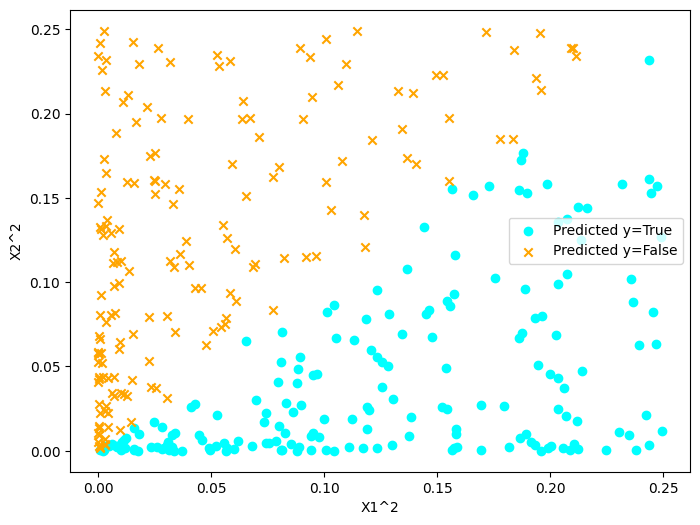

In [47]:
# Fit a logistic regression model to the data using non-linear functions of X1 and X2

# squared terms
data2 = pd.DataFrame({'X1^2': x1**2, 'X2^2': x2**2, 'Y': y.astype(int)})
X = data2[['X1^2', 'X2^2']]
y = data2['Y']
X_sm = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size=0.3, random_state=42)

logit_model = sm.Logit(y_train, X_train).fit()
y_train_pred = logit_model.predict(X_train)

fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(X_train['X1^2'][y_train_pred >= 0.5], X_train['X2^2'][y_train_pred >= 0.5], marker='o', color='cyan', label='Predicted y=True')
ax.scatter(X_train['X1^2'][y_train_pred < 0.5], X_train['X2^2'][y_train_pred < 0.5], marker='x', color='orange', label='Predicted y=False')
ax.set_xlabel('X1^2')
ax.set_ylabel('X2^2')
ax.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.510836
         Iterations 6


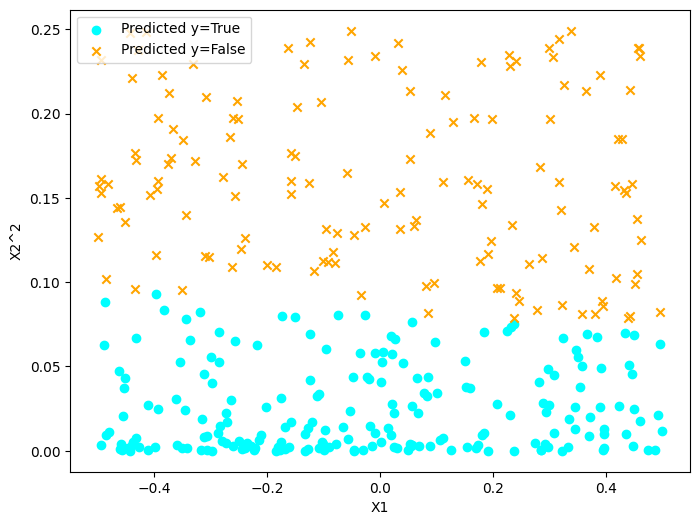

In [ ]:
# squared terms on x2 only
data2 = pd.DataFrame({'X1': x1, 'X2^2': x2**2, 'Y': y.astype(int)})
X = data2[['X1', 'X2^2']]
y = data2['Y']
X_sm = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size=0.3, random_state=42)

logit_model = sm.Logit(y_train, X_train).fit()
y_train_pred = logit_model.predict(X_train)

fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(X_train['X1'][y_train_pred >= 0.5], X_train['X2^2'][y_train_pred >= 0.5], marker='o', color='cyan', label='Predicted y=True')
ax.scatter(X_train['X1'][y_train_pred < 0.5], X_train['X2^2'][y_train_pred < 0.5], marker='x', color='orange', label='Predicted y=False')
ax.set_xlabel('X1')
ax.set_ylabel('X2^2')
ax.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.549470
         Iterations 6


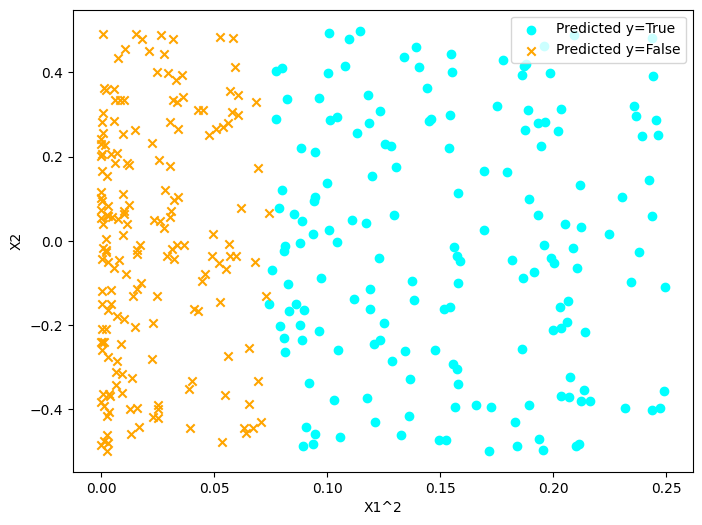

In [49]:
# squared terms on x1 only
data2 = pd.DataFrame({'X1^2': x1**2, 'X2': x2, 'Y': y.astype(int)})
X = data2[['X1^2', 'X2']]
y = data2['Y']
X_sm = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size=0.3, random_state=42)

logit_model = sm.Logit(y_train, X_train).fit()
y_train_pred = logit_model.predict(X_train)

fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(X_train['X1^2'][y_train_pred >= 0.5], X_train['X2'][y_train_pred >= 0.5], marker='o', color='cyan', label='Predicted y=True')
ax.scatter(X_train['X1^2'][y_train_pred < 0.5], X_train['X2'][y_train_pred < 0.5], marker='x', color='orange', label='Predicted y=False')
ax.set_xlabel('X1^2')
ax.set_ylabel('X2')
ax.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.691659
         Iterations 3


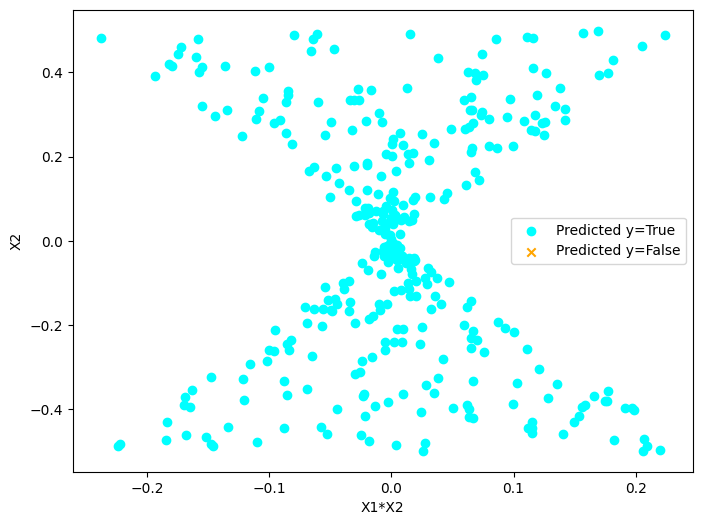

In [50]:
# interaction term
data2 = pd.DataFrame({'X1*X2': x1*x2, 'X2': x2, 'Y': y.astype(int)})
X = data2[['X1*X2', 'X2']]
y = data2['Y']
X_sm = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size=0.3, random_state=42)

logit_model = sm.Logit(y_train, X_train).fit()
y_train_pred = logit_model.predict(X_train)

fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(X_train['X1*X2'][y_train_pred >= 0.5], X_train['X2'][y_train_pred >= 0.5], marker='o', color='cyan', label='Predicted y=True')
ax.scatter(X_train['X1*X2'][y_train_pred < 0.5], X_train['X2'][y_train_pred < 0.5], marker='x', color='orange', label='Predicted y=False')
ax.set_xlabel('X1*X2')
ax.set_ylabel('X2')
ax.legend()
plt.show()

In [79]:
# Fit a support vector classifier to the data with X1 and X2 as predictors. 
from sklearn.svm import SVC 
from ISLP.svm import plot as plot_svm
data = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y.astype(int)})
X = data[['X1', 'X2']]
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SVM_Linear = SVC(kernel='linear', C=1) 
SVM_Linear.fit(X_train, y_train)

y_train_pred = SVM_Linear.predict(X_train)

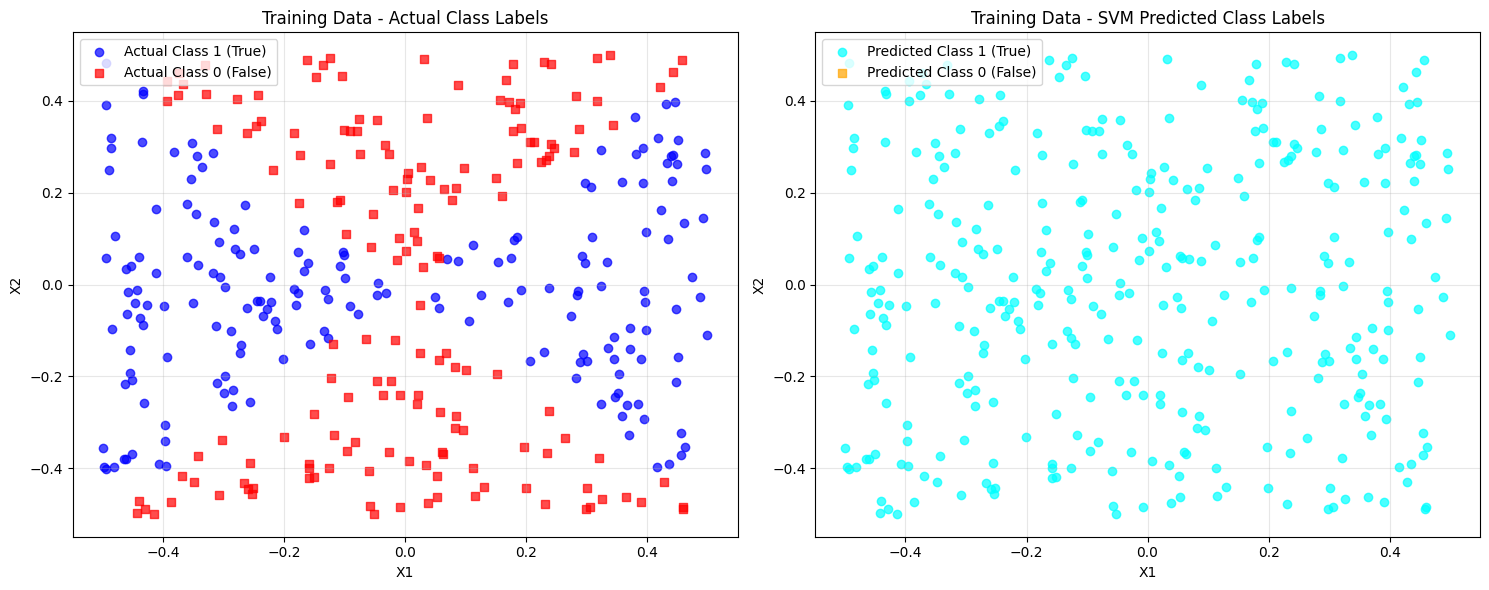

In [80]:
# Plot the observations colored according to predicted class labels

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual class labels
ax1.scatter(X_train['X1'][y_train == 1], X_train['X2'][y_train == 1], 
           color='blue', marker='o', label='Actual Class 1 (True)', alpha=0.7)
ax1.scatter(X_train['X1'][y_train == 0], X_train['X2'][y_train == 0], 
           color='red', marker='s', label='Actual Class 0 (False)', alpha=0.7)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Training Data - Actual Class Labels')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Predicted class labels
ax2.scatter(X_train['X1'][y_train_pred == 1], X_train['X2'][y_train_pred == 1], 
           color='cyan', marker='o', label='Predicted Class 1 (True)', alpha=0.7)
ax2.scatter(X_train['X1'][y_train_pred == 0], X_train['X2'][y_train_pred == 0], 
           color='orange', marker='s', label='Predicted Class 0 (False)', alpha=0.7)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('Training Data - SVM Predicted Class Labels')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [81]:
# Fit a SVM using a non-linear kernel 
SVM_nonLinear = SVC(kernel="rbf", gamma=1, C=1) 
SVM_nonLinear.fit(X_train, y_train)

y_train_pred_non = SVM_nonLinear.predict(X_train)

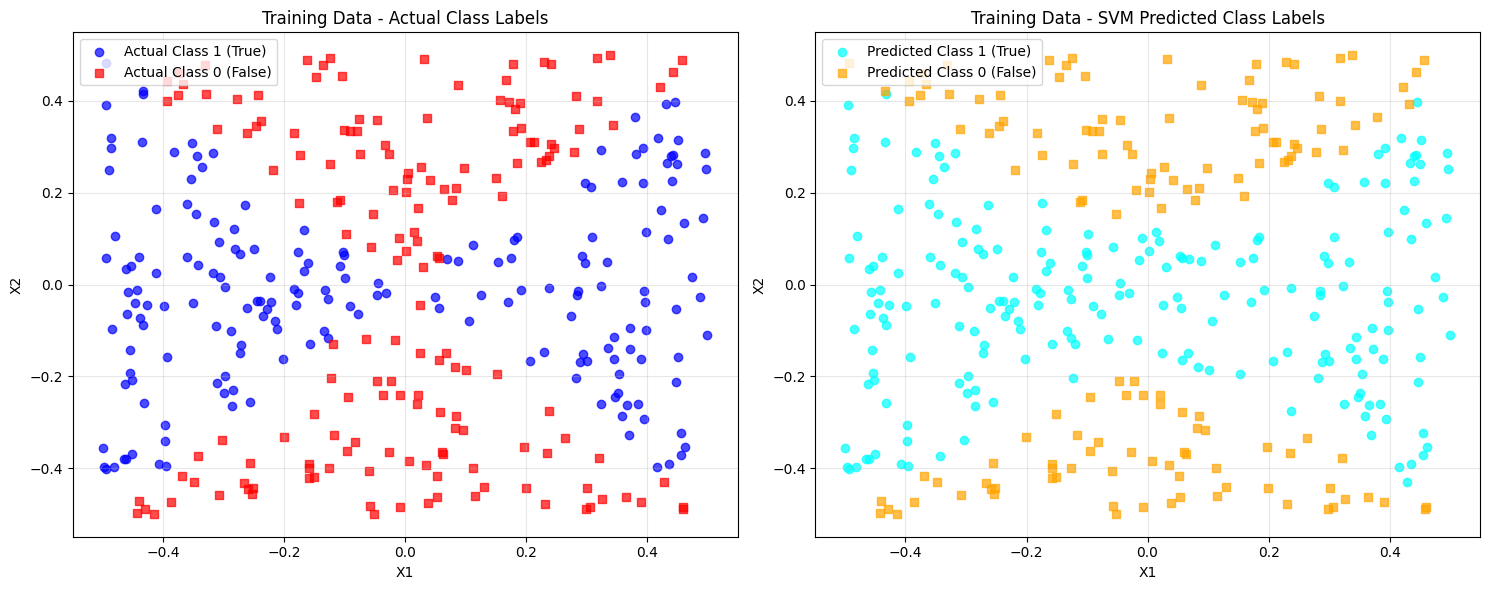

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual class labels
ax1.scatter(X_train['X1'][y_train == 1], X_train['X2'][y_train == 1], 
           color='blue', marker='o', label='Actual Class 1 (True)', alpha=0.7)
ax1.scatter(X_train['X1'][y_train == 0], X_train['X2'][y_train == 0], 
           color='red', marker='s', label='Actual Class 0 (False)', alpha=0.7)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Training Data - Actual Class Labels')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Predicted class labels
ax2.scatter(X_train['X1'][y_train_pred_non == 1], X_train['X2'][y_train_pred_non == 1], 
           color='cyan', marker='o', label='Predicted Class 1 (True)', alpha=0.7)
ax2.scatter(X_train['X1'][y_train_pred_non == 0], X_train['X2'][y_train_pred_non == 0], 
           color='orange', marker='s', label='Predicted Class 0 (False)', alpha=0.7)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('Training Data - SVM Predicted Class Labels')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Since the data is not linearly separable, linear classifiers such as logistic regression or linear SVMs may struggle to find a good decision boundary. Even the non-linear predictors would struggle capture the actual relationship in this case, becausethe real relationship is complicated. Using non-linear classifiers, such as SVMs with RBF kernels can capture the complex relationships in the data better.

Chapter 10: Question 2

a)

$$f_m (X) = Pr(Y = m|X) = \frac{e^{Z_m+c}}{\sum^9_{\ell = 0} e^{Z_{\ell}+c}} = \frac{e^{Z_m} \times e^c}{e^c \times \sum^9_{\ell = 0} e^{Z_{\ell}}}= \frac{e^{Z_m}}{\sum^9_{\ell = 0} e^{Z_{\ell}}}$$


b)

$$Pr(Y = k|X = x) = \frac{e^{(\beta_{k0}+c_0)+(\beta_{k1}+c_1)x_1+...+(\beta_{kp}+c_p)x_p}}{\sum^K_{\ell = 1} e^{(\beta_{l0}+c_0)+(\beta_{l1}+c_1)x_1+...+(\beta_{lp}+c_p)x_p}} = \frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{kp}x_p} \times e^{c_0+c_1 x_1+...+c_p x_p}}{ e^{c_0+c_1 x_1+...+c_p x_p} \times \sum^K_{\ell = 1} e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}} =\frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{kp}x_p} }{\sum^K_{\ell = 1} e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}} $$
